In [1]:
import math
import numpy as np
import wandb

import torch
import torch_geometric
from torch_geometric.data import Data

from gnn_architectures import MyGnn

import gnn_io as gio
import gnn_architectures as garch

import pprint
import itertools

## 1. Define model and parameters

## 2. Load data

In [20]:
def compute_baseline_error(dataset_normalized):
    """
    Computes the baseline Mean Squared Error (MSE) for normalized y values in the dataset.

    Parameters:
    - dataset_normalized: A dataset containing normalized y values.

    Returns:
    - mse_value: The baseline MSE value.
    """
    # Concatenate the normalized y values from the dataset
    y_values_normalized = np.concatenate([data.y for data in dataset_normalized])

    # Compute the mean of the normalized y values
    mean_y_normalized = np.mean(y_values_normalized)

    # Convert numpy arrays to torch tensors
    y_values_normalized_tensor = torch.tensor(y_values_normalized, dtype=torch.float32)
    mean_y_normalized_tensor = torch.tensor(mean_y_normalized, dtype=torch.float32)

    # Create the target tensor with the same shape as y_values_normalized_tensor
    target_tensor = mean_y_normalized_tensor.expand_as(y_values_normalized_tensor)

    # Instantiate the MSELoss function
    mse_loss = torch.nn.MSELoss()

    # Compute the MSE
    mse = mse_loss(y_values_normalized_tensor, target_tensor)

    return mse.item()

In [3]:
# Load the list of dictionaries
data_dict_list = torch.load('../data/dataset_1pm_0-1400_more_features.pt')
# torch.load('../data/dataset_1pm_0-1382_with_more_infos.pt') if model_is_basic else 

# Reconstruct the Data objects
datalist = [Data(x=d['x'], edge_index=d['edge_index'], pos=d['pos'], y=d['y']) for d in data_dict_list]

dataset_only_relevant_dimensions = gio.cut_dimensions(dataset=datalist, indices_of_dimensions_to_keep=[0, 1])
dataset_normalized = gio.normalize_dataset(dataset_only_relevant_dimensions)



In [51]:
# Instantiate the MSELoss function
mse_loss = torch.nn.MSELoss(reduction='none')

# Compute the MSE
base_case_values = np.concatenate([data.x[:, 1] for data in dataset_normalized]).reshape(-1, 1)
target_tensor = np.concatenate([data.y for data in dataset_normalized])

# Convert numpy arrays to torch tensors
base_case_values_tensor = torch.tensor(base_case_values, dtype=torch.float)
target_tensor = torch.tensor(target_tensor, dtype=torch.float)

mse = mse_loss(base_case_values_tensor, target_tensor)
#print(mse.item())

In [52]:
mse.shape

torch.Size([43140512, 1])

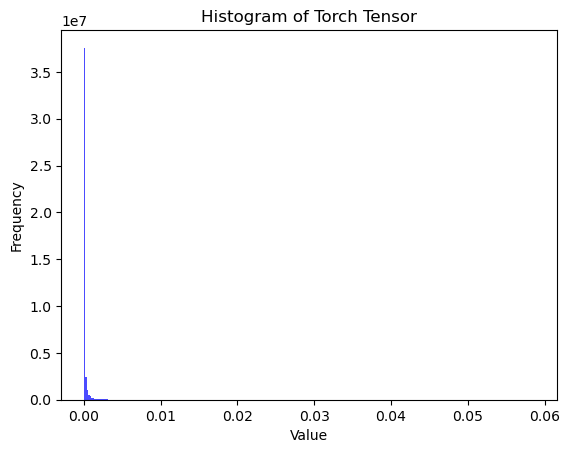

In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# Convert to NumPy array
array = mse.numpy()

# Plot histogram
plt.hist(array, bins=300, alpha=0.7, color='blue')
plt.title('Histogram of Torch Tensor')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [55]:
mse.max()

tensor(0.0587)

In [56]:
sqrt_mse = torch.sqrt(torch.tensor(0.0587))

In [57]:
sqrt_mse

tensor(0.2423)

In [58]:
mse.min()

tensor(0.)